<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/tanque_mezcla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Tanque de mezcla

Nombre: Juan Manuel G.G

Fecha: 21 de diciembre del 2020

## Balance de masa 

$$\frac{dm}{dt} = \dot{m}_{ent} - \dot{m}_{sal}$$

$$\frac{d(\rho V)}{dt} =  \dot{w}_{1} +  \dot{w}_{2} -  \dot{w}$$

$$\frac{d V}{dt} = \frac{\dot{w}_{1} +  \dot{w}_{2} -  \dot{w}}{\rho}$$

## Balance de especies 

$$\frac{dm_{x}}{dt} = \dot{m}_{x,ent} - \dot{m}_{x,sal}$$

$$\frac{d(V \rho x)}{dt} = \dot{w}_{1} x_{1} + \dot{w}_{2} x_{2} - \dot{w} x$$


$$\rho x\frac{dV}{dt} + \rho V\frac{dx}{dt} = \dot{w}_{1} x_{1} + \dot{w}_{2} x_{2} - \dot{w} x$$


$$ \rho V\frac{dx}{dt} = \dot{w}_{1} x_{1} + \dot{w}_{2} x_{2} - \dot{w} x - \rho x (\frac{\dot{w}_{1} +  \dot{w}_{2} -  \dot{w}}{\rho})$$

$$ \rho V\frac{dx}{dt} = \dot{w}_{1}( x_{1} - x)+ \dot{w}_{2}( x_{2}  - x) $$


$$ \frac{dx}{dt} = \frac{\dot{w}_{1}( x_{1} - x)+ \dot{w}_{2}( x_{2} - x)}{\rho V} $$

Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

Establecer modelo

In [13]:
def tank(s, t):

  # Vriables de estado
  V, x  = s

  # Balances
  dVdt = (w1 + w2 - w)/rho
  dxdt = (w1*(x1-x) + w2*(x2-x))/(V*rho)

  return[dVdt, dxdt]

Valor de parámetros 

In [3]:
rho = 900.0 # densidad, kg/m**3
w1 = 500.0 # corriente 1, kg/min
w2 = 200.0 # corriente 2, kg/min
w = 650 # flujo de salida, kg/min
x1 = 0.4 # composición de corriente 1, fracción másica
x2 = 0.75 # composición de corriente 2, fracción másica

Condiciones iniciales 

In [4]:
V = 2.0
x = 0.0
s = [V, x]

Timepo de simulación

In [5]:
t = np.linspace(0,10.0)

Integrar EDOs

In [14]:
out = odeint(func=tank, y0=s, t=t)

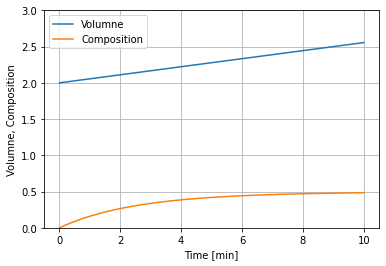

In [15]:
plt.plot(t,out) 
plt.xlabel("Time [min]")
plt.ylabel("Volumne, Composition")
plt.legend(["Volumne","Composition"])
plt.ylim(0,3)
plt.grid()

Análisis de estado estable

$$\frac{dV}{dt} = 0 \hspace{1cm} \rightarrow \hspace{1cm} w_{1} + w_{2} = w$$

$$\frac{dx}{dt} = 0 \hspace{1cm} \rightarrow \hspace{1cm} \bar{x} = \frac{w_{2}x_{2} + w_{2}x_{2}}{w_{1} + w_{2}}$$

In [18]:
def steady_state(w1,w2,x1,x2):

  xs = (w1*x1 + w2*x2)/(w1 + w2)

  return xs  

In [19]:
steady_state(500,200,0.4,0.75)

0.5